<a href="https://colab.research.google.com/github/Dibya069/Generative_AI-Codes-to-learn-/blob/main/LangGraph_(Tools_%2B_Memory_%2B_Chatbot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langgraph to create Chatbot

In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing i

In [ ]:
from google.colab import userdata
import os

groq_api = userdata.get("GROQ_API_KEY")
langsmith_api = userdata.get("LANGSMITH_API")

In [ ]:
os.environ["LANGCHAIN_API_KEY"] = langsmith_api
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Dibya_Langgraph"

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(api_key=groq_api, model="Gemma2-9b-It")

In [ ]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x798bff2f8100>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x798bff2f98a0>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********'))

## Building chatbot

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    msgs:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"msgs" : llm.invoke(state["msgs"])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph = graph_builder.compile()

In [ ]:
graph

CompiledStateGraph(nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<msgs>(recurse=True, writes=[ChannelWriteEntry(channel='msgs', value=<object object at 0x798c01363510>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['msgs']), ChannelWrite<start:chatbot>(recurse=True, writes=[ChannelWriteEntry(channel='start:chatbot', value='__start__', skip_none=False, mapper=None)], require_at_least_one_of=None)]), 'chatbot': PregelNode(config={'tags': [], 'metadata': {}, 'configurable': {}}, channels={'msgs': 'msgs'}, triggers=['start:chatbot'], mapper=functools.partial(<function _coerce_state at 0x798bff8d2e60>, <class '__main__.State'>), writers=[ChannelWrite<chatbot,msgs>(recurse=True, writes=[ChannelWriteEntry(channel='chatbot', value='chatbot', skip_none=False, mapper=None), ChannelWriteEntry(channel='msgs', value=<object object at 0x

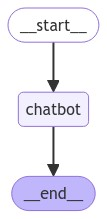

In [ ]:
from IPython.display import display, Image

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  pass

In [ ]:
while 1:
  user_input = input("User : ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({"msgs" : ("user", user_input)}):
    #print(event.values())
    for val in event.values():
      print("Assistant", val["msgs"].content)

User : Hi
Assistant Hi there! 👋 

What can I do for you today? 😊

User : tell me about today news in India ??
Assistant I do not have access to real-time information, including news updates. To get the latest news in India, I recommend checking reputable news sources online or watching news channels. 

Here are some popular Indian news sources:

* **Websites:**
    * The Times of India: https://timesofindia.indiatimes.com/
    * NDTV: https://www.ndtv.com/
    * The Hindu: https://www.thehindu.com/
    * Hindustan Times: https://www.hindustantimes.com/
    * Indian Express: https://indianexpress.com/
* **News Channels:**
    * NDTV 24x7
    * Times Now
    * CNN-News18
    * Republic TV
    * India Today

Remember to be critical of the information you consume and verify it with multiple sources. 


User : Tell me which god is real (Hindu / Muslim / Christ) ??
Assistant I'm sorry, but I can't answer that question. As an AI assistant, I don't have personal beliefs or the ability to deter

# LangrGraph Chatbot with Tools

In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 751.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing

In [ ]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.5 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=69051f973dfbbf925ce7b86de99d468ed95dea128a49294c52c3db1a4a1f7932
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=2a834c4666f9c810ff6f7b69e11e809fd2dad698d63d4df7c5c5355bf657f253
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [ ]:
## working with tools
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia_wrapper)

In [ ]:
wikipedia_tool.invoke("Who is Jisoo ??")

'Page: Jisoo\nSummary: Kim Ji-soo (Korean: 김지수; born January 3, 1995), known mononymously as Jisoo, is a South Korean singer and actress. She is a member of the South Korean girl group Blackpink, which debuted under YG Entertainment in August 2016. Outside of her music career, she made her acting debu'

In [ ]:
tools = [wikipedia_tool]

In [ ]:
from typing import Annotated

from langchain_groq import ChatGroq
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata

groq_api = userdata.get("GROQ_API_KEY")
llm = ChatGroq(api_key=groq_api, model="Gemma2-9b-It")

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


In [ ]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[wikipedia_tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")

In [ ]:
graph = graph_builder.compile()

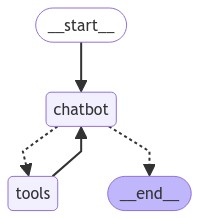

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
user_input="Hi there!, My name is Jennie"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is Jennie
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_a31s)
 Call ID: call_a31s
  Args:
    query: Jennie


/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_4ppn)
 Call ID: call_4ppn
  Args:
    query: Jennie singer
================================= Tool Message =================================
Name: wikipedia

Page: Jennie (singer)
Summary: Jennie Kim (Korean: 김제니; born January 16, 1996), known mononymously as Jennie, is a South Korean singer, rapper, and actress. Born and raised in South Korea, Jennie studied in New Zealand for five years before returning to South Korea in 2010. She is a member of the So
================================== Ai Message ==================================

Jennie is a South Korean singer, rapper, and actress.


In [ ]:
user_input="Is spider man stronger than Scarlet Witch ??"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Is spider man stronger than Scarlet Witch ??
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_y7h1)
 Call ID: call_y7h1
  Args:
    query: Spider-Man vs Scarlet Witch
================================= Tool Message =================================
Name: wikipedia

Page: Scarlet Witch
Summary: The Scarlet Witch (Wanda Maximoff) is a character appearing in American comic books published by Marvel Comics. Created by writer Stan Lee and artist Jack Kirby, the character first appeared in The X-Men #4 (March 1964) in the Silver Age of Comic Books. Originally said t
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_7fjw)
 Call ID: call_7fjw
  Args:
    query: Spider-Man
================================= Tool Message =================================
Name: wikipedia

Page: Spider-Man
Summary:

# Adding Memory to the Chatbot

In [ ]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [ ]:
graph_memory = graph_builder.compile(checkpointer=memory)

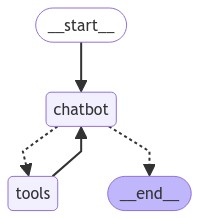

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph_memory.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
config = {"configurable": {"thread_id": "1"}}

while 1:
  user_input = input("User : ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break

  events = graph_memory.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
  )
  # for event in events:
  #   event["messages"][-1].pretty_print()

  for event in events:
    print(event["messages"][-1].pretty_print())

User : WHO is RDJ
================================ Human Message =================================

WHO is RDJ
None
================================== Ai Message ==================================

RDJ is short for Robert Downey Jr., a very famous American actor.
None
User : Tell me some of his movies
================================ Human Message =================================

Tell me some of his movies
None
================================== Ai Message ==================================

Robert Downey Jr. has been in a ton of movies! Here are a few of his most well-known:

* **Iron Man** (and the rest of the Marvel Cinematic Universe films where he plays Tony Stark/Iron Man)
* **Sherlock Holmes**
* **Chaplin** 
* **Tropic Thunder**
* **Zodiac**
* **Kiss Kiss Bang Bang**
None
User : q
Good Bye
